# **Importing Data and Necessary Packages**

In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import nltk

df = pd.read_csv('US_youtube_trending_data.csv', encoding='utf-8', engine='python', on_bad_lines='skip')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install nltk

In [ ]:
!pip show nltk

Name: nltk
Version: 3.9.1
Summary: Natural Language Toolkit
Home-page: https://www.nltk.org/
Author: NLTK Team
Author-email: nltk.team@gmail.com
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: click, joblib, regex, tqdm
Required-by: textblob


# **Data Visualization and Stats**

In [ ]:
# Descriptive statistics
viewcount_stats = df['view_count'].describe()
print(viewcount_stats)

# Range
viewcount_range = df['view_count'].max() - df['view_count'].min()
print(f"Range of viewcount: {viewcount_range}")


count    2.687810e+05
mean     2.734521e+06
std      9.794190e+06
min      0.000000e+00
25%      4.725540e+05
50%      9.368860e+05
75%      2.106194e+06
max      1.407644e+09
Name: view_count, dtype: float64
Range of viewcount: 1407643634


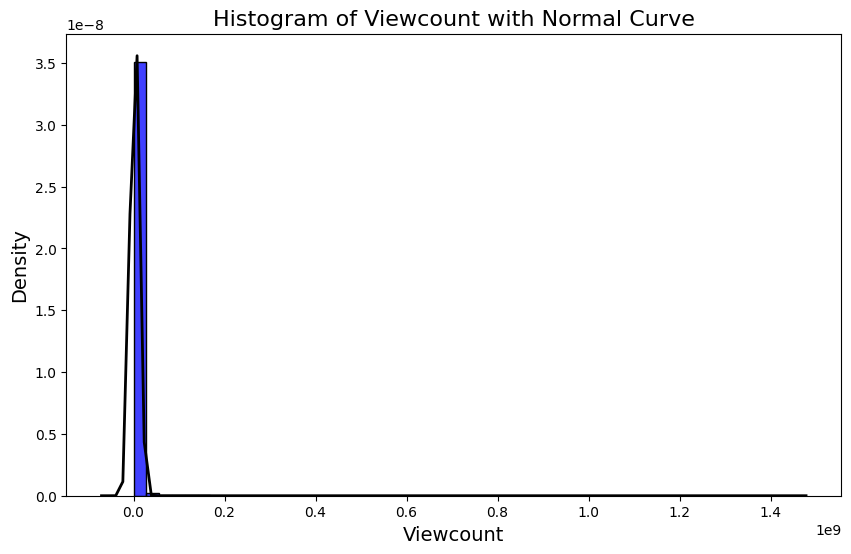

In [ ]:
# Remove non-finite values
df_clean = df[df['view_count'].notna() & np.isfinite(df['view_count'])]

# Normal distribution curve
mu, std = stats.norm.fit(df_clean['view_count'])

# Histogram with normal curve
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['view_count'], bins=50, kde=False, color='blue', stat='density')

# Plot normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)

# labels and title
plt.title('Histogram of Viewcount with Normal Curve', fontsize=16)
plt.xlabel('Viewcount', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


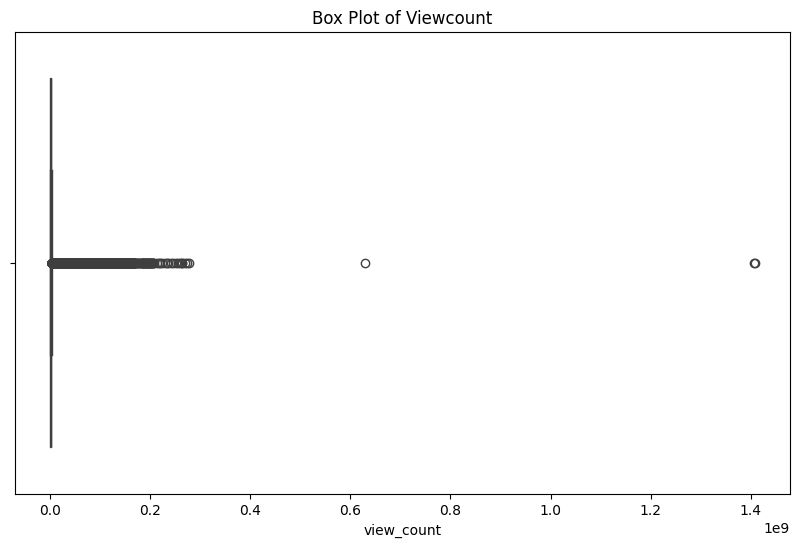

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['view_count'])

# labels and title
plt.title('Box Plot of Viewcount')
plt.xlabel('view_count')
plt.show()


In [ ]:
# Q1 (25th percentile) & Q3 (75th percentile)
Q1 = df['view_count'].quantile(0.25)
Q3 = df['view_count'].quantile(0.75)

# Interquartile Range (IQR)
IQR = Q3 - Q1

# Outlier definition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
df_no_outliers = df[(df['view_count'] >= lower_bound) & (df['view_count'] <= upper_bound)]

In [ ]:
# Descriptive statistics w/out outliers
print(df_no_outliers['view_count'].describe())

# Range w/out outliers
viewcount_range = df_no_outliers['view_count'].max() - df['view_count'].min()
print(f"Range of viewcount: {viewcount_range}")

count    2.397410e+05
mean     1.156614e+06
std      9.794973e+05
min      0.000000e+00
25%      4.371630e+05
50%      8.074180e+05
75%      1.569414e+06
max      4.556468e+06
Name: view_count, dtype: float64
Range of viewcount: 4556468


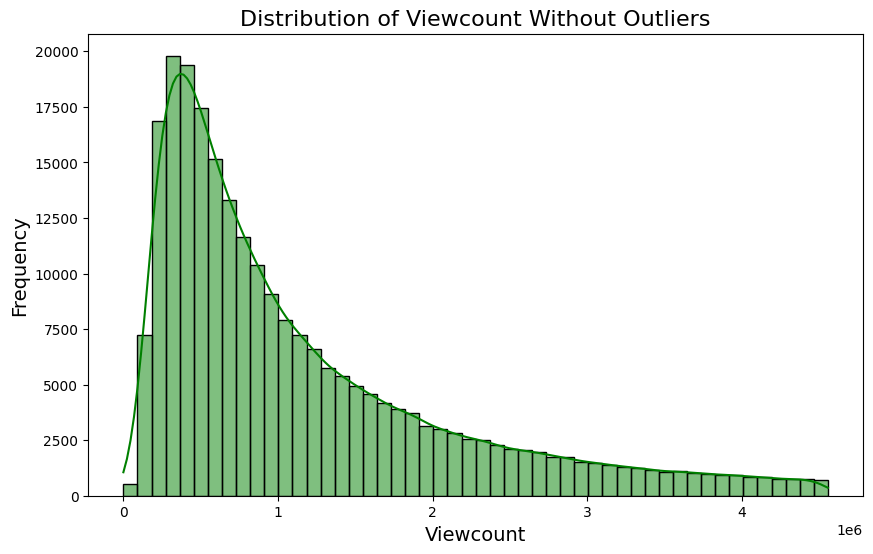

In [ ]:
# histogram w/out outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers['view_count'], kde=True, bins=50, color='green')

plt.title('Distribution of Viewcount Without Outliers', fontsize=16)
plt.xlabel('Viewcount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

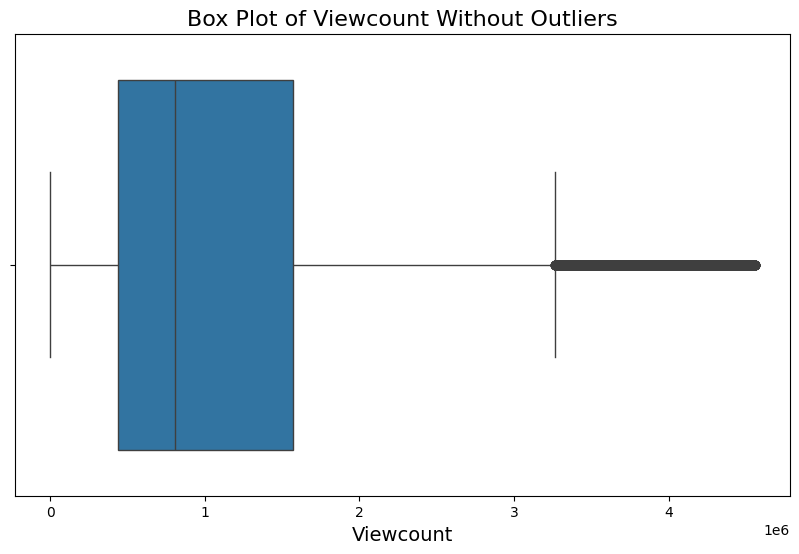

In [ ]:
# box plot w/out outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['view_count'])

plt.title('Box Plot of Viewcount Without Outliers', fontsize=16)
plt.xlabel('Viewcount', fontsize=14)
plt.show()

In [ ]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['trending_date'] = pd.to_datetime(df['trending_date'])

df['timeTakenToTrend'] = df['trending_date'] - df['publishedAt']

#print(df[['publishedAt', 'trending_date', 'timeTakenToTrend']].head())

df['timeTakenToTrend'].head(10)

,timeTakenToTrend
0,0 days 04:39:46
1,0 days 06:59:50
2,0 days 07:25:54
3,0 days 07:21:05
4,0 days 08:49:55
5,0 days 03:59:56
6,-1 days +23:42:19
7,0 days 06:44:49
8,1 days 01:33:01
9,0 days 00:59:50


# **Feature Engineering**

In [ ]:
print(df.columns)
print(df.shape[1]) #Should be 17

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'timeTakenToTrend'],
      dtype='object')
17


In [ ]:
#If we want to, we can now remove the variables 'publishedAt' and 'trending_date'
df = df.drop(['publishedAt', 'trending_date'], axis=1)
print(df.columns)
print(df.shape[1]) #Now reduced to 15

Index(['video_id', 'title', 'channelId', 'channelTitle', 'categoryId', 'tags',
       'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description',
       'timeTakenToTrend'],
      dtype='object')
15


In [ ]:
# Adding in a likes to dislikes ratio feature
df['likes_ratio'] = df['likes'] / df['dislikes'].replace(0, 1)
print(df.columns)
print(df.shape[1]) #Should be 16 now
print(df['likes_ratio'])

Index(['video_id', 'title', 'channelId', 'channelTitle', 'categoryId', 'tags',
       'view_count', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'description',
       'timeTakenToTrend', 'likes_ratio'],
      dtype='object')
16
0             26.798975
1             52.519327
2            134.622146
3             12.527478
4             47.512448
              ...      
268776      2345.000000
268777    107811.000000
268778     41941.000000
268779     42845.000000
268780    246678.000000
Name: likes_ratio, Length: 268781, dtype: float64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)
#description is the only column with missing values
#replace those entryies with 0
df = df.fillna(0);
#check if it worked
missing_values = df.isnull().sum()
print(missing_values)


video_id                0
title                   0
channelId               0
channelTitle            0
categoryId              0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
timeTakenToTrend        0
likes_ratio             0
dtype: int64
video_id             0
title                0
channelId            0
channelTitle         0
categoryId           0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
timeTakenToTrend     0
likes_ratio          0
dtype: int64


# **Second round of feature engineering**

**Ideas**
1. (likes + dislikes) / view_count to measure the engangment ratios
2. comment_count / view_count to capture how many viewers are engaged enough to leave comments.
3. view_count / timeTakenToTrend to measure how quickly the video gained views (eseential this  would be average views per day)
4. likes_ratio * comment_count, which may show how "liked" a video is relative to how many people engage via comments.
5. comments_disabled, ratings_disabled, and like-to-dislike ratio. Combine these to create a user interaction restriction flag. To show that content is engaging but controversial.

2) comment_count / view_count to capture how many viewers are engaged enough to leave comments.

In [ ]:
#calculating comment engangment rate
df['comment_engagement_rate'] = df['comment_count'] / df['view_count']

#display results
df[['video_id','comment_count','view_count' ]].head(10)

,video_id,comment_count,view_count
0,3C66w5Z0ixs,35313,1514614
1,M9Pmf9AB4Mo,16549,2381688
2,J78aPJ3VyNs,40221,2038853
3,kXLn3HkpjaA,7647,496771
4,VIUo6yapDbc,2196,1123889
5,w-aidBdvZo8,7506,949491
6,uet14uf9NsE,4558,470446
7,ua4QMFQATco,6455,1050143
8,SnsPZj91R7E,6613,1402687
9,SsWHMAhshPQ,5618,741028


3) view_count / timeTakenToTrend to measure how quickly the video gained views (average views per hour)



In [ ]:
# Calculate timeTakenToTrend in hours for all rows
time_in_hours = df['timeTakenToTrend'].dt.total_seconds() / 3600

# Calculate views per hour for all rows
df['views_per_hour'] = df['view_count'] / time_in_hours

# Display all rows with relevant columns
df[['video_id', 'view_count', 'timeTakenToTrend', 'views_per_hour']].head(10)


,video_id,view_count,timeTakenToTrend,views_per_hour
0,3C66w5Z0ixs,1514614,0 days 04:39:46,3.248308e+05
1,M9Pmf9AB4Mo,2381688,0 days 06:59:50,3.403762e+05
2,J78aPJ3VyNs,2038853,0 days 07:25:54,2.743467e+05
3,kXLn3HkpjaA,496771,0 days 07:21:05,6.757512e+04
4,VIUo6yapDbc,1123889,0 days 08:49:55,1.272527e+05
5,w-aidBdvZo8,949491,0 days 03:59:56,2.374387e+05
6,uet14uf9NsE,470446,-1 days +23:42:19,-1.596235e+06
7,ua4QMFQATco,1050143,0 days 06:44:49,1.556472e+05
8,SnsPZj91R7E,1402687,1 days 01:33:01,5.489909e+04
9,SsWHMAhshPQ,741028,0 days 00:59:50,7.430921e+05


In [ ]:
# Filter and display rows where timeTakenToTrend is negative I FEEL LIKE THE FOLLOWING DATA POINTS MIGHT BE INCORRECT?
negative_trend_time_rows = df[df['timeTakenToTrend'] < pd.Timedelta(0)]
negative_trend_time_rows[['video_id', 'view_count', 'timeTakenToTrend']].head()

,video_id,view_count,timeTakenToTrend
6,uet14uf9NsE,470446,-1 days +23:42:19
43,gi3VMMiFHVg,756814,-1 days +21:29:28
47,Aur7UgTGlL0,937569,-1 days +22:32:43
212,p35UfHw7PPI,86485,-1 days +20:14:50
400,JFm7YDVlqnI,3498886,-1 days +19:59:52


# **One Hot Encoding**

In [ ]:
#look at the columns with string values (referred to as objects here) and with boolean values
alpha_columns = list(df.select_dtypes(include=['bool', 'object']).columns)

#determine the number of unique values per column in each column with string/boolean values

for column in alpha_columns:
  unique_values = df[column].nunique()
  print("Column Name:", column)
  print("Number of Unique Values:", unique_values, "\n")



Column Name: video_id
Number of Unique Values: 47141 

Column Name: title
Number of Unique Values: 48470 

Column Name: channelId
Number of Unique Values: 8301 

Column Name: channelTitle
Number of Unique Values: 8542 

Column Name: tags
Number of Unique Values: 32908 

Column Name: thumbnail_link
Number of Unique Values: 47141 

Column Name: comments_disabled
Number of Unique Values: 2 

Column Name: ratings_disabled
Number of Unique Values: 2 

Column Name: description
Number of Unique Values: 48448 



Since the 'comments_disabled' and 'ratings disabled' column each have only 2 uniqiue values, we determined that these columns are best suited for one hot encoding. We will let "True" be represented by the integer 1 and "False" be represented by the integer 0.

In [ ]:
#ohe --> One Hot Encoded
ohe_comments_disabled = []

for t_or_f in df['comments_disabled']:
  if t_or_f == True:
    ohe_comments_disabled.append(1)
  if t_or_f == False:
    ohe_comments_disabled.append(0)

#rewrites column with one hot encoded values
df['comments_disabled'] = ohe_comments_disabled

In [ ]:
ohe_ratings_disabled = []

for t_or_f in df['ratings_disabled']:
  if t_or_f == True:
    ohe_ratings_disabled.append(1)
  if t_or_f == False:
    ohe_ratings_disabled.append(0)

#rewrites column with one hot encoded values
df['ratings_disabled'] = ohe_ratings_disabled

In [ ]:
df['comments_disabled']

,comments_disabled
0,0
1,0
2,0
3,0
4,0
...,...
268776,0
268777,0
268778,0
268779,0


In [ ]:
df['ratings_disabled']

,ratings_disabled
0,0
1,0
2,0
3,0
4,0
...,...
268776,0
268777,0
268778,0
268779,0


# **User Interaction Restriction Flag**

5) Combine comments_disabled, ratings_disabled, and like-to-dislike ratio to create a user interaction restriction flag. Show that content is engaging but controversial.

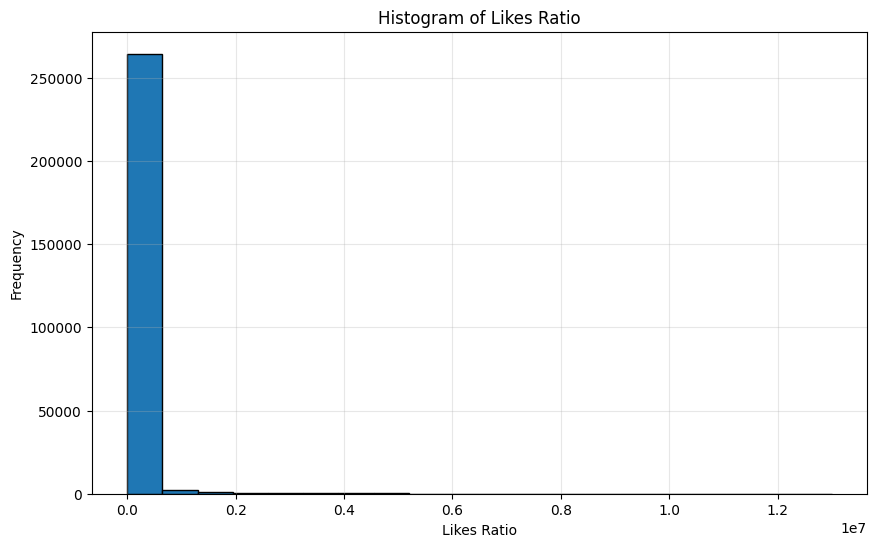

Bin 1: 0.00 to 649694.70, Count: 264366
Bin 2: 649694.70 to 1299389.40, Count: 2254
Bin 3: 1299389.40 to 1949084.10, Count: 745
Bin 4: 1949084.10 to 2598778.80, Count: 324
Bin 5: 2598778.80 to 3248473.50, Count: 170
Bin 6: 3248473.50 to 3898168.20, Count: 203
Bin 7: 3898168.20 to 4547862.90, Count: 214
Bin 8: 4547862.90 to 5197557.60, Count: 223
Bin 9: 5197557.60 to 5847252.30, Count: 79
Bin 10: 5847252.30 to 6496947.00, Count: 11
Bin 11: 6496947.00 to 7146641.70, Count: 20
Bin 12: 7146641.70 to 7796336.40, Count: 33
Bin 13: 7796336.40 to 8446031.10, Count: 55
Bin 14: 8446031.10 to 9095725.80, Count: 24
Bin 15: 9095725.80 to 9745420.50, Count: 5
Bin 16: 9745420.50 to 10395115.20, Count: 2
Bin 17: 10395115.20 to 11044809.90, Count: 17
Bin 18: 11044809.90 to 11694504.60, Count: 20
Bin 19: 11694504.60 to 12344199.30, Count: 5
Bin 20: 12344199.30 to 12993894.00, Count: 11


In [ ]:
# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['likes_ratio'], bins=20, edgecolor='black')
plt.title('Histogram of Likes Ratio')
plt.xlabel('Likes Ratio')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

hist, bin_edges = np.histogram(df['likes_ratio'], bins=20)
for i in range(len(hist)):
    print(f"Bin {i+1}: {bin_edges[i]:.2f} to {bin_edges[i+1]:.2f}, Count: {hist[i]}")

In [ ]:
def user_interaction_restriction(row):
    comments_disabled = row['comments_disabled']
    ratings_disabled = row['ratings_disabled']
    likes = row['likes']
    dislikes = row['dislikes']

    # Calculate likes_ratio as a percentage of total likes + dislikes
    total_engagement = likes + dislikes
    if total_engagement == 0:
        likes_ratio_percentage = 0  # Handle case where there are no likes or dislikes
    else:
        likes_ratio_percentage = (likes / total_engagement) * 100

    # Both comments and ratings are disabled
    if comments_disabled and ratings_disabled:
        return True  # Content is flagged as restricted

    # Either comments or ratings are disabled and likes percentage is low
    if (comments_disabled or ratings_disabled) and likes_ratio_percentage < 30:
        return True  # Content is flagged as controversial

    # Neither comments nor ratings are disabled, but likes percentage is very low
    if likes_ratio_percentage < 20:  # Lower threshold for controversy
        return True  # Content is flagged as controversial based on percentage

    # Content is not flagged
    return False

In [ ]:
df['restricted'] = df.apply(user_interaction_restriction, axis=1)

In [ ]:
true_false_counts = df['restricted'].value_counts()

print(true_false_counts)

restricted
False    267216
True       1565
Name: count, dtype: int64


# **'Data Visualization for Non-String Data**





In [ ]:
non_string_columns = df.select_dtypes(exclude=['object'])
print(non_string_columns.columns)

#important columns = view_count, comment_count, timeTakenToTrend, likes_ratio
#Note: The following variables are true or false - comments_disabled, ratings_disabled

Index(['categoryId', 'view_count', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'timeTakenToTrend',
       'likes_ratio', 'restricted'],
      dtype='object')


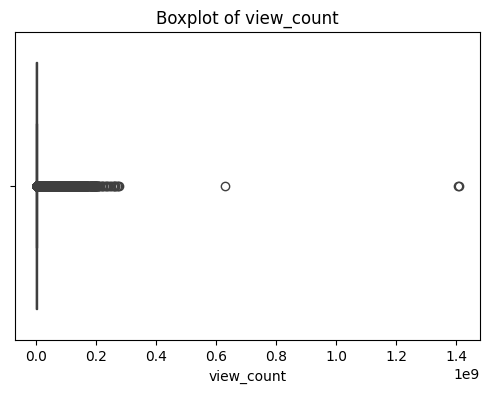

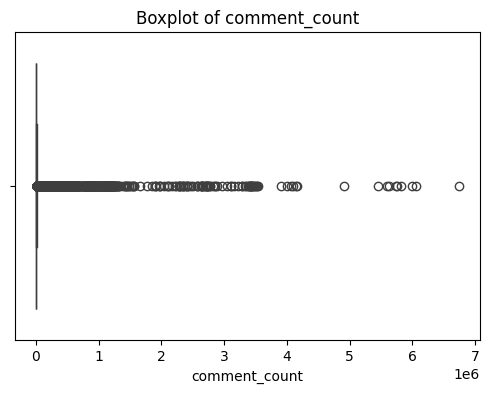

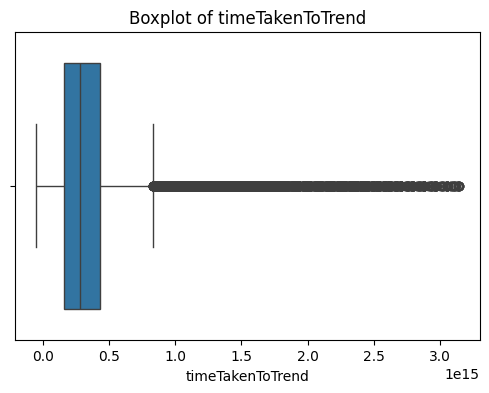

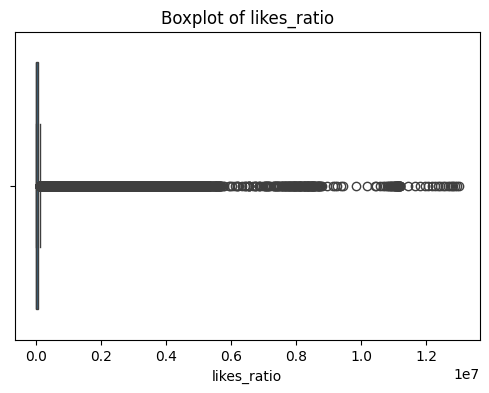

In [ ]:
def plot_boxplot(column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

# Plot individual boxplots
plot_boxplot('view_count')
plot_boxplot('comment_count')
plot_boxplot('timeTakenToTrend')
plot_boxplot('likes_ratio')

In [ ]:
# Applying a log transformation should compress the extreme values while spreading the smaller counts, which could reduce the skew and make the distribution more normal.
df['view_count_log'] = np.log1p(df['view_count'])

df['comment_count_log'] = np.log1p(df['comment_count'])

 #keep most of your data but reduce the impact of outliers.
from scipy.stats import mstats
df['likes_ratio_winsorized'] = mstats.winsorize(df['likes_ratio'], limits=[0.1, 0.1])  # Cap at 1% on both ends

# This column shows a significant spread with long tails, meaning it's highly skewed. It looks like the variable might have some very large values, which could represent time periods that are rare. Apply capping (clipping) to limit the extreme values.
df['timeTakenToTrend_clipped'] = df['timeTakenToTrend'].clip(upper=df['timeTakenToTrend'].quantile(0.99))


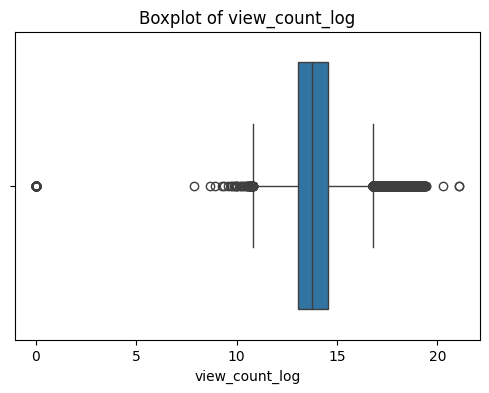

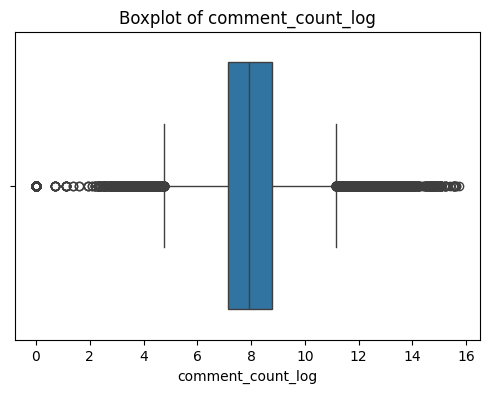

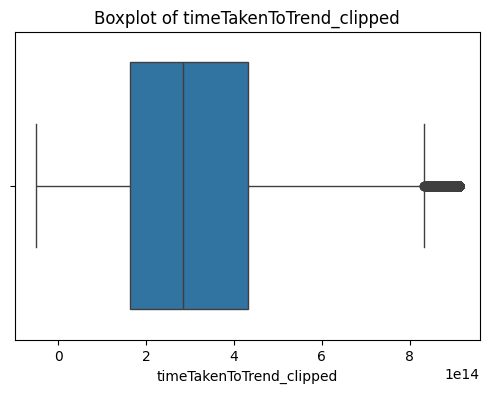

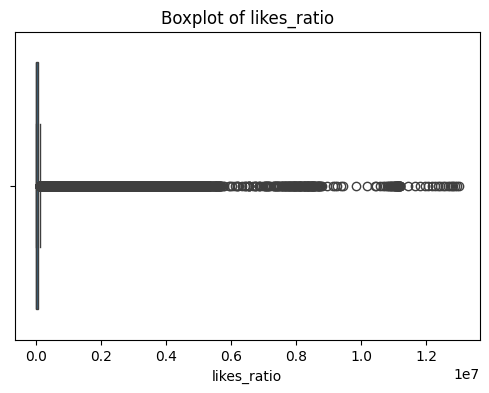

In [ ]:
def plot_boxplot(column_name):
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.show()

plot_boxplot('view_count_log')
plot_boxplot('comment_count_log')
plot_boxplot('timeTakenToTrend_clipped')
plot_boxplot('likes_ratio')

# **'Title' Preprocessing**

In [ ]:
df['title']

,title
0,I ASKED HER TO BE MY GIRLFRIEND...
1,Apex Legends | Stories from the Outlands – “Th...
2,I left youtube for a month and THIS is what ha...
3,XXL 2020 Freshman Class Revealed - Official An...
4,Ultimate DIY Home Movie Theater for The LaBran...
...,...
268776,Total solar eclipse causing tourism boost acro...
268777,Food Delivery Apps: Last Week Tonight with Joh...
268778,12 Things NO-ONE Tells You About Japan | Feat....
268779,Buying My Dream Car At 21


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df['title'][1]

'Apex Legends | Stories from the Outlands – “The Endorsement”'

- Converting text to lowercase
- Removing stop words such as "and," "is," and "the," since these occur frequently in language and don't carry meaning that contributes to predictive value.
- Performing stemming, which reduces a word to its root form by removing or replacing suffixes
- Performing tokenization to parse a body of text into smaller units
- Removing punctuation

In [ ]:
def preprocess_text(text):

    # Convert text to string
    text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove all non-alphabetic characters, keeping only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra whitespace (leading, trailing, and multiple spaces)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    # Return cleaned and processed text
    return ' '.join(lemmatized_tokens)

def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n)
    return [' '.join(ngram) for ngram in ngrams]


In [ ]:
df['title_preprocessed'] = df['title'].apply(lambda x: generate_ngrams(x, 1))

df['title_preprocessed'] = df['title_preprocessed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [ ]:
print("Unigrams for each title (first 5 rows):")
print(df[['title', 'title_preprocessed']].head())

Unigrams for each title (first 5 rows):
                                               title  \
0                 I ASKED HER TO BE MY GIRLFRIEND...   
1  Apex Legends | Stories from the Outlands – “Th...   
2  I left youtube for a month and THIS is what ha...   
3  XXL 2020 Freshman Class Revealed - Official An...   
4  Ultimate DIY Home Movie Theater for The LaBran...   

                                  title_preprocessed  
0                I ASKED HER TO BE MY GIRLFRIEND ...  
1  Apex Legends | Stories from the Outlands – “ T...  
2  I left youtube for a month and THIS is what ha...  
3  XXL 2020 Freshman Class Revealed - Official An...  
4  Ultimate DIY Home Movie Theater for The LaBran...  


In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

title_count_vectorizer = CountVectorizer(ngram_range=(1, 2))
title_count_matrix = title_count_vectorizer.fit_transform(df['title_preprocessed'])

title_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
title_tfidf_matrix = title_tfidf_vectorizer.fit_transform(df['title_preprocessed'])


In [ ]:
title_count_matrix

<268781x196902 sparse matrix of type '<class 'numpy.int64'>'
	with 3897236 stored elements in Compressed Sparse Row format>

In [ ]:
title_tfidf_matrix

<268781x196902 sparse matrix of type '<class 'numpy.float64'>'
	with 3897236 stored elements in Compressed Sparse Row format>

# **'Tags' Preprocessing**

In [ ]:
df['tags'][1]

'Apex Legends|Apex Legends characters|new Apex Legend|Apex Legends Rampart|Apex Legends Season 6|Apex Legends Boosted|Battle Pass|Season 6 Battle Pass|Apex Legends new season|Apex Legends game|Respawn Apex Legends|Battle Royale game|Battle Royale|Battle Royale shooter|Apex Games|squad play|multiplayer shooter|Apex Legends PS4|Apex Legends Xbox|Apex Legends PC|Apex Legends Origin|Respawn Entertainment|Electronic Arts|Titanfall 2|fun battle royale'

In [ ]:
def preprocess_text(text):

    # Convert text to string
    text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove all non-alphabetic characters, keeping only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove extra whitespace (leading, trailing, and multiple spaces)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]

    # Return cleaned and processed text
    return ' '.join(lemmatized_tokens)

def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n)
    return [' '.join(ngram) for ngram in ngrams]


In [ ]:
df['tags_preprocessed'] = df['tags'].apply(lambda x: generate_ngrams(x, 1))

df['tags_preprocessed'] = df['tags_preprocessed'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [ ]:
print("Unigrams for each tags (first 5 rows):")
print(df[['tags', 'tags_preprocessed']].head())

Unigrams for each tags (first 5 rows):
                                                tags  \
0  brawadis|prank|basketball|skits|ghost|funny vi...   
1  Apex Legends|Apex Legends characters|new Apex ...   
2  jacksepticeye|funny|funny meme|memes|jacksepti...   
3  xxl freshman|xxl freshmen|2020 xxl freshman|20...   
4  The LaBrant Family|DIY|Interior Design|Makeove...   

                                   tags_preprocessed  
0  brawadis|prank|basketball|skits|ghost|funny vi...  
1  Apex Legends|Apex Legends characters|new Apex ...  
2  jacksepticeye|funny|funny meme|memes|jacksepti...  
3  xxl freshman|xxl freshmen|2020 xxl freshman|20...  
4  The LaBrant Family|DIY|Interior Design|Makeove...  


In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tags_count_vectorizer = CountVectorizer(ngram_range=(1, 2))
tags_count_matrix = tags_count_vectorizer.fit_transform(df['tags_preprocessed'])

tags_tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tags_tfidf_matrix = tags_tfidf_vectorizer.fit_transform(df['tags_preprocessed'])


# **'Description' Preprocessing**

In [ ]:
df['description']

,description
0,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,"While running her own modding shop, Ramya Pare..."
2,I left youtube for a month and this is what ha...
3,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,Transforming The LaBrant Family's empty white ...
...,...
268776,Millions of people in the United States are tr...
268777,"John Oliver discusses food delivery apps, how ..."
268778,We reveal 12 things no-one tells you to expect...
268779,Use code JOE at checkout to get discounts on M...


In [ ]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import KeyedVectors
!pip install emoji
import emoji

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 8.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
VIRAL_WORDS = {
    # Attention grabbers
    'insane', 'incredible', 'amazing', 'shocking', 'unbelievable',
    # Call to actions
    'subscribe', 'like', 'follow', 'share', 'comment',
    # Promotional
    'giveaway', 'free', 'exclusive', 'limited',
    # Content indicators
    'official', 'reveal', 'announcement', 'featuring',
    # Urgency
    'emergency', 'breaking', 'urgent', 'leaked'
}

def preprocess_text(text):
    """Preprocess text while preserving viral indicators."""
    text = str(text)

    # Preserve URLs, hashtags, and mentions
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    hashtags = re.findall(r'#\w+', text)
    mentions = re.findall(r'@\w+', text)

    # Remove URLs but keep a placeholder
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' URL ', text)

    # Tokenize
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english')) - VIRAL_WORDS  # Don't remove viral words

    # Process tokens
    processed_tokens = []
    for token in tokens:
        # Preserve hashtags and mentions
        if token.startswith('#') or token.startswith('@'):
            processed_tokens.append(token)
            continue

        # Keep capitalization if word is all caps (emphasis) or is a viral word
        token_lower = token.lower()
        if token.isupper() or token_lower in VIRAL_WORDS:
            processed_tokens.append(token)
        else:
            # Remove stopwords and lemmatize
            if token_lower not in stop_words:
                processed_tokens.append(lemmatizer.lemmatize(token_lower))

    # Add back preserved elements
    processed_text = ' '.join(processed_tokens)
    processed_text += ' ' + ' '.join(hashtags + mentions)
    processed_text += ' URL' * len(urls)

    return processed_text

# Process descriptions
df['preprocessed_description'] = df['description'].apply(preprocess_text)

# Create TF-IDF features
# tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=500)
# tfidf_matrix = tfidf.fit_transform(df['preprocessed_description'])


# Convert the TF-IDF matrix into a dense format (DataFrame-friendly)
# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
#df = pd.concat([df, tfidf_df], axis=1)

In [ ]:
# Generates bigrams for each preprocessed description
df['bigrams'] = df['preprocessed_description'].apply(lambda x: generate_ngrams(x, 2))

print("Bigrams for each description (first 5 rows):")
print(df[['description', 'bigrams']].head())
print()

Bigrams for each description (first 5 rows):
                                         description  \
0  SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...   
1  While running her own modding shop, Ramya Pare...   
2  I left youtube for a month and this is what ha...   
3  Subscribe to XXL → http://bit.ly/subscribe-xxl...   
4  Transforming The LaBrant Family's empty white ...   

                                             bigrams  
0  [SUBSCRIBE BRAWADIS, BRAWADIS ▶, ▶ URL, URL FO...  
1  [running modding, modding shop, shop ,, , ramy...  
2  [I left, left youtube, youtube month, month ha...  
3  [Subscribe XXL, XXL →, → URL, URL XXL, XXL pre...  
4  [transforming labrant, labrant family, family ...  



# **'Description' Vectorization**

In [ ]:
# Vectorization
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
count_matrix = count_vectorizer.fit_transform(df['preprocessed_description'])

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df['preprocessed_description'])

# df = df.rename(columns={'preprocessed_description': 'description'})

# **Heat Map**



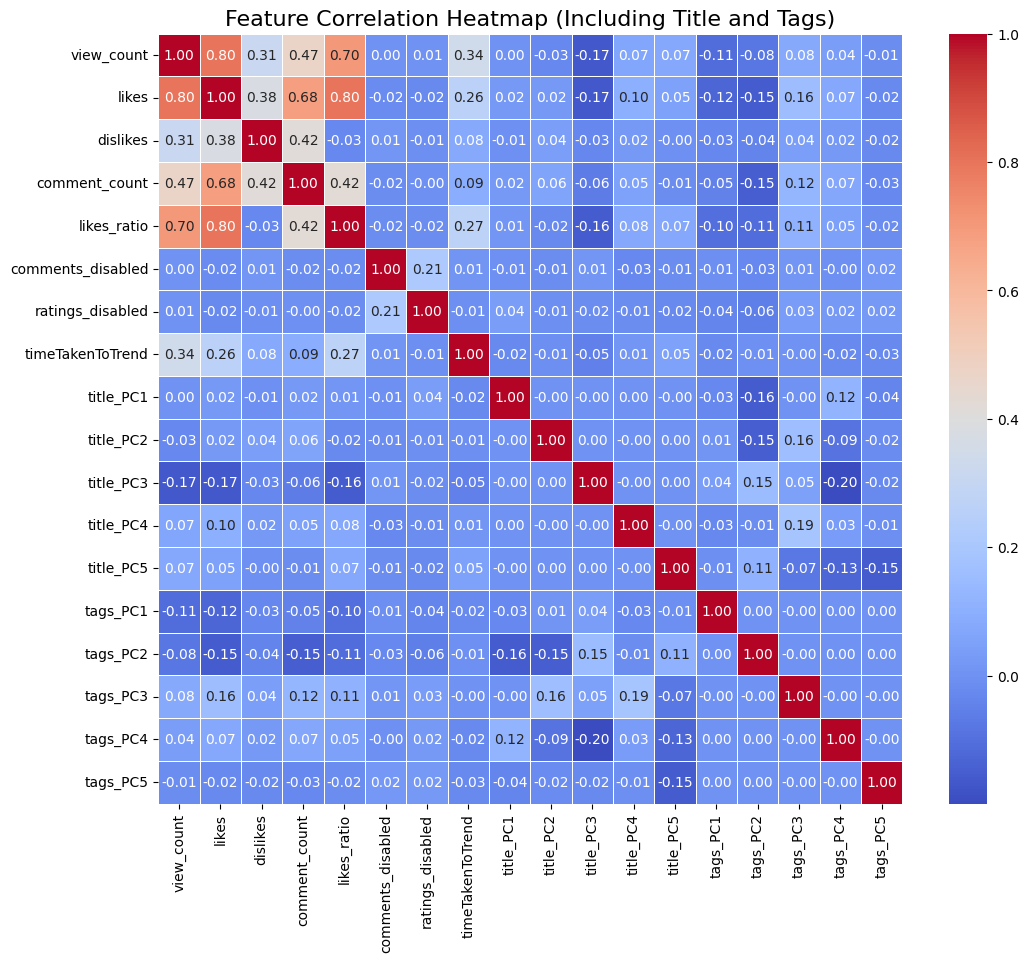

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming combined_data_no_outliers_normalized is your dataframe
# Make sure your DataFrame has columns like 'Views', 'Likes', 'Dislikes', 'Comment Count'

# Updated numerical features list to match the column names in your DataFrame
numerical_features = ['Views', 'Likes', 'Dislikes', 'Comment Count']

# Check the columns in the combined_data_no_outliers_normalized to verify column names
print("Columns in combined_data_no_outliers_normalized:")
print(combined_data_no_outliers_normalized.columns)

# Now, calculate the correlation matrix for the numerical features
correlation_matrix = combined_data_no_outliers_normalized[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# **Trial - K Means Clustering**

In [ ]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

vectorized_docs = vectorize(df['title'], model=model)
len(vectorized_docs), len(vectorized_docs[0])

(105464, 100)

In [ ]:
import os
import random
import re
import string

import nltk
import numpy as np
import pandas as pd

from gensim.models import Word2Vec

from nltk import word_tokenize
from nltk.corpus import stopwords

from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score

nltk.download("stopwords")
nltk.download("punkt")

SEED = 42
random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)
np.random.seed(SEED)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def mbkmeans_clusters(
    X,
    k,
    mb,
    print_silhouette_values,
):
    """Generate clusters and print Silhouette metrics using MBKmeans

    Args:
        X: Matrix of features.
        k: Number of clusters.
        mb: Size of mini-batches.
        print_silhouette_values: Print silhouette values per cluster.

    Returns:
        Trained clustering model and labels based on X.
    """
    km = MiniBatchKMeans(n_clusters=k, batch_size=mb).fit(X)
    print(f"For n_clusters = {k}")
    print(f"Silhouette coefficient: {silhouette_score(X, km.labels_):0.2f}")
    print(f"Inertia:{km.inertia_}")

    if print_silhouette_values:
        sample_silhouette_values = silhouette_samples(X, km.labels_)
        print(f"Silhouette values:")
        silhouette_values = []
        for i in range(k):
            cluster_silhouette_values = sample_silhouette_values[km.labels_ == i]
            silhouette_values.append(
                (
                    i,
                    cluster_silhouette_values.shape[0],
                    cluster_silhouette_values.mean(),
                    cluster_silhouette_values.min(),
                    cluster_silhouette_values.max(),
                )
            )
        silhouette_values = sorted(
            silhouette_values, key=lambda tup: tup[2], reverse=True
        )
        for s in silhouette_values:
            print(
                f"    Cluster {s[0]}: Size:{s[1]} | Avg:{s[2]:.2f} | Min:{s[3]:.2f} | Max: {s[4]:.2f}"
            )
    return km, km.labels_

In [ ]:
clustering, cluster_labels = mbkmeans_clusters(
    X=vectorized_docs,
    k=5,
    mb=500,
    print_silhouette_values=True,
)
df_clusters = pd.DataFrame({
    "text": docs,
    "tokens": [" ".join(text) for text in tokenized_docs],
    "cluster": cluster_labels
})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


For n_clusters = 5


KeyboardInterrupt: 

In [ ]:
print("Most representative terms per cluster (based on centroids):")
for i in range(50):
    tokens_per_cluster = ""
    most_representative = model.wv.most_similar(positive=[clustering.cluster_centers_[i]], topn=5)
    for t in most_representative:
        tokens_per_cluster += f"{t[0]} "
    print(f"Cluster {i}: {tokens_per_cluster}")

In [ ]:
import random
import pandas as pd
# Function to generate random non-viral YouTube video data with poor descriptions and realistic titles
def generate_video_data_with_realistic_titles(num_samples):
    sample_titles = [
    "Watching the Clouds Move",
    "Making Instant Noodles",
    "A Bird Perched on a Tree",
    "Folding Laundry Quietly",
    "Driving to the Grocery Store",
    "Sunset from My Apartment Balcony",
    "Trying Out My Old Camera",
    "Writing Notes for a Class",
    "Simple Paper Airplane Tutorial",
    "Cleaning My Desk",
    "A Slow Walk Through the Neighborhood",
    "Boiling Water for Tea",
    "First Attempt at Doodling",
    "Assembling a Basic Chair",
    "Looking at Waves on the Beach",
    "Turning Pages in a Book",
    "Adjusting My Bike Seat",
    "How I Organize My Sock Drawer",
    "Opening My Mail Today",
    "My Dog Napping on the Floor",
    "Painting My Fence",
    "Refilling My Water Bottle",
    "Sweeping the Kitchen Floor",
    "Unpacking Groceries",
    "A Squirrel in My Yard",
    "Watching Cars Drive By",
    "Testing a Pen That Doesn’t Work",
    "Sitting on My Porch",
    "Rain Drops on a Window",
    "Trying to Fold a Fitted Sheet",
    "Organizing Books on a Shelf",
    "Feeding My Goldfish",
    "Taking a Short Nap",
    "Fixing a Squeaky Door",
    "Looking at My Old Yearbook",
    "Filling Out a Crossword Puzzle",
    "Making a Sandwich",
    "Trying a New Pair of Socks",
    "Walking to the Post Office",
    "Drawing Circles with a Compass",
    "Changing a Lightbulb",
    "Dusting the Living Room",
    "Rolling Coins for the Bank",
    "Taking Out the Trash",
    "Watching Paint Dry",
    "Hanging Clothes to Dry",
    "Watering My Plants",
    "Watching a Candle Burn",
    "Unwrapping a New Soap Bar",
    "Rearranging My Fridge Magnets"
]

    bad_descriptions = [
        "This is a video.",
        "Doing nothing",
        "Something I recorded.",
        "Not much to say about this.",
        "Just watch if you want.",
        "It's a random thing I made.",
        "Nothing special here.",
        "Hope you like it, I guess.",
        "Not sure why I made this.",
        "Just a regular video.",
        "Thought I'd upload this."
    ]

    data = {
        "Title": [random.choice(sample_titles) for _ in range(num_samples)],
        "Description": [random.choice(bad_descriptions) for _ in range(num_samples)],
        "Tags": [
            ", ".join(random.sample(
                ["boring", "random", "simple", "quiet", "regular", "video", "upload", "thing", "low effort"],
                k=random.randint(1, 5)
            )) for _ in range(num_samples)
        ],
        "Views": [random.randint(10, 500) for _ in range(num_samples)],
        "Likes": [random.randint(0, 50) for _ in range(num_samples)],
        "Dislikes": [random.randint(0, 10) for _ in range(num_samples)],
        "Comment Count": [random.randint(0, 20) for _ in range(num_samples)]
    }
    return pd.DataFrame(data)

# Generate dataset with 10,000 entries and improved titles
large_realistic_titles_dataset = generate_video_data_with_realistic_titles(10000)

# Save to CSV
large_realistic_titles_file_path = "non_viral_youtube_videos_realistic_titles.csv"
large_realistic_titles_dataset.to_csv(large_realistic_titles_file_path, index=False)

large_realistic_titles_file_path


'non_viral_youtube_videos_realistic_titles.csv'

In [ ]:
import numpy as np
import pickle

# Load the saved GBDT model
try:
    with open('GBDT_model.pkl', 'rb') as file:
        GBDT_model_loaded = pickle.load(file)
    print("GBDT model loaded successfully!")

    # Example of correct input format (make sure this matches the training data format)
    # Replace this with your actual 21 features.
    sample_data = np.array([[25, 120, 80, 100, 36.5, 75]])  # Additional features

    # Make prediction using the loaded model
    prediction = GBDT_model_loaded.predict(sample_data)
    print(f"Prediction: {prediction}")

except Exception as e:
    print(f"Error loading GBDT model: {e}")

#**Random Forest Model**

In [ ]:
import pandas as pd
import numpy as np
import random
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load your non-viral data and viral data
non_viral_data = pd.read_csv('non_viral_youtube_videos.csv')
viral_sample = pd.read_csv('US_youtube_trending_data.csv')

# Step 1: Preprocess text data (title, tags, and description)
def preprocess_text(text):
    """Preprocess text by tokenizing, removing stopwords, lemmatizing, and removing non-alphabetic characters."""
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # Remove non-alphabetic characters
        tokens = word_tokenize(text)
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
        return ' '.join(tokens)
    return ""

# Apply the preprocessing to non-viral data
non_viral_data['title_preprocessed'] = non_viral_data['Title'].apply(preprocess_text)
non_viral_data['tags_preprocessed'] = non_viral_data['Tags'].apply(preprocess_text)
non_viral_data['description_preprocessed'] = non_viral_data['Description'].apply(preprocess_text)

# Apply preprocessing to viral data
viral_sample['title_preprocessed'] = viral_sample['title'].apply(preprocess_text)
viral_sample['tags_preprocessed'] = viral_sample['tags'].apply(preprocess_text)
viral_sample['description_preprocessed'] = viral_sample['description'].apply(preprocess_text)

# Step 2: Sample exactly 10,000 viral videos
viral_sample = viral_sample.sample(n=10000, random_state=42)  # Sampling 10,000 viral videos

# Step 3: Vectorize the preprocessed text data (Title, Tags, Description)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100)

# Vectorize titles
title_tfidf_non_viral = tfidf_vectorizer.fit_transform(non_viral_data['title_preprocessed'])
title_tfidf_viral = tfidf_vectorizer.transform(viral_sample['title_preprocessed'])

# Vectorize tags
tags_tfidf_non_viral = tfidf_vectorizer.fit_transform(non_viral_data['tags_preprocessed'])
tags_tfidf_viral = tfidf_vectorizer.transform(viral_sample['tags_preprocessed'])

# Vectorize descriptions
description_tfidf_non_viral = tfidf_vectorizer.fit_transform(non_viral_data['description_preprocessed'])
description_tfidf_viral = tfidf_vectorizer.transform(viral_sample['description_preprocessed'])

# Step 4: Combine the vectorized features with the numerical features
numerical_features_non_viral = ['Views', 'Likes', 'Dislikes', 'Comment Count']
numerical_features_viral = ['view_count', 'likes', 'dislikes', 'comment_count']

X_non_viral = pd.concat([non_viral_data[numerical_features_non_viral].reset_index(drop=True),  # Reset index
                         pd.DataFrame(title_tfidf_non_viral.toarray()).reset_index(drop=True),
                         pd.DataFrame(tags_tfidf_non_viral.toarray()).reset_index(drop=True),
                         pd.DataFrame(description_tfidf_non_viral.toarray()).reset_index(drop=True)],
                        axis=1)

X_viral = pd.concat([viral_sample[numerical_features_viral].reset_index(drop=True),  # Reset index
                     pd.DataFrame(title_tfidf_viral.toarray()).reset_index(drop=True),
                     pd.DataFrame(tags_tfidf_viral.toarray()).reset_index(drop=True),
                     pd.DataFrame(description_tfidf_viral.toarray()).reset_index(drop=True)],
                    axis=1)

# Ensure both datasets have identical column names for concatenation
X_non_viral.columns = range(X_non_viral.shape[1])
X_viral.columns = range(X_viral.shape[1])

# Add label column (1 for viral, 0 for non-viral)
non_viral_data['label'] = 0
viral_sample['label'] = 1

# Step 5: Combine the datasets (non-viral data and 10,000 viral data)
combined_data = pd.concat([X_non_viral, X_viral], ignore_index=True)
combined_labels = pd.concat([non_viral_data['label'], viral_sample['label']], ignore_index=True)

# Step 6: Remove outliers for all numerical features
def remove_outliers(df, numerical_columns):
    """Remove outliers based on IQR method for each numerical column."""
    for col in numerical_columns:
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List all numerical columns in the combined dataset
numerical_features = numerical_features_non_viral + numerical_features_viral

# Remove outliers from numerical columns
combined_data_no_outliers = remove_outliers(combined_data, numerical_features)

# Step 7: Normalize the data (Z-score normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined_data_normalized = scaler.fit_transform(combined_data_no_outliers)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(combined_data_normalized, combined_labels, test_size=0.2, random_state=42)

# Step 9: Train a Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 10: Evaluate the model
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9998


#**TF_IDF Vectorization Results Visualization**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# # Define a custom list of stop words to exclude URL-related terms
# custom_stopwords = [
#     'https', 'http', 'www', 'com', 'org', 'net', 'bit', 'ly', 'www.facebook', 'youtube.com', 'instagram.com', 'twitter.com', 't.co', 'bit.ly'
# ]

custom_stopwords = [
    'the', 'of', 'and', 'to', 'in', 'for', 'on', 'a', 'an', 'with', 'is', 'this', 'it', 'at',
    'by', 'from', 'as', 'that', 'were', 'be', 'are', 'or', 'which', 'also', 'not', 'but', 'i',
    'you', 'we', 'they', 'com', 'www', 'http', 'https',
    'my', 'me', 'we', 'us', 'our', 'your', 'yours', 'he', 'him', 'his', 'her', 'hers', 'she', 'they',
    'them', 'their', 'theirs', 'it', 'its', 'just', 'very', 'really', 'some', 'much',
    'all', 'any', 'other', 'too', 'enough', 'also','was', 'were', 'have', 'had', 'has', 'having', 'be', 'being', 'been', 'do', 'does', 'did',
    'doing', 'at', 'on', 'by', 'for', 'to', 'from', 'about', 'as', 'through',
    'between', 'above', 'below', 'after', 'before', 'along', 'around', 'down', 'up', 'in', 'out',
    'like', 'now', 'then', 'because', 'so', 'how', 'why', 'when', 'where', 'which', 'what', 'can',
    'will', 'just', 'go', 'back', 'get','com', 'ly', 'bit ly', 'bit'
]



# Assuming combined_data is your dataframe containing the text features
# Fill NaN values with empty strings in the relevant columns
combined_data['title'].fillna('', inplace=True)
combined_data['tags'].fillna('', inplace=True)
combined_data['description'].fillna('', inplace=True)

# Initialize TF-IDF vectorizer with stop words removal and the custom stop words list
title_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=custom_stopwords)
tags_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=custom_stopwords)
description_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=custom_stopwords)

# Perform TF-IDF vectorization
title_tfidf_matrix = title_tfidf.fit_transform(combined_data['title'])
tags_tfidf_matrix = tags_tfidf.fit_transform(combined_data['tags'])
description_tfidf_matrix = description_tfidf.fit_transform(combined_data['description'])

# Extract the top 100 words (or ngrams) from the TF-IDF matrices
title_features = title_tfidf.get_feature_names_out()
tags_features = tags_tfidf.get_feature_names_out()
description_features = description_tfidf.get_feature_names_out()

# Get the importance (TF-IDF scores) for each word
title_tfidf_scores = np.array(title_tfidf_matrix.sum(axis=0)).flatten()
tags_tfidf_scores = np.array(tags_tfidf_matrix.sum(axis=0)).flatten()
description_tfidf_scores = np.array(description_tfidf_matrix.sum(axis=0)).flatten()

# Create a DataFrame to hold the features and their corresponding scores
title_df = pd.DataFrame({'word': title_features, 'score': title_tfidf_scores})
tags_df = pd.DataFrame({'word': tags_features, 'score': tags_tfidf_scores})
description_df = pd.DataFrame({'word': description_features, 'score': description_tfidf_scores})

# Combine the results into one DataFrame
all_text_features_df = pd.concat([title_df, tags_df, description_df], ignore_index=True)

# Sort the features by their score in descending order (most important first)
all_text_features_df_sorted = all_text_features_df.sort_values(by='score', ascending=False)

# Select the top 100 most important words (or ngrams)
top_100_words = all_text_features_df_sorted.head(100)

# Print the top 100 words in a table
print(top_100_words.to_string(index=False))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Define a custom list of stop words to exclude URL-related terms
custom_stopwords = [
    'the', 'of', 'and', 'to', 'in', 'for', 'on', 'a', 'an', 'with', 'is', 'this', 'it', 'at',
    'by', 'from', 'as', 'that', 'were', 'be', 'are', 'or', 'which', 'also', 'not', 'but', 'i',
    'you', 'we', 'they', 'com', 'www', 'http', 'https',
    'my', 'me', 'we', 'us', 'our', 'your', 'yours', 'he', 'him', 'his', 'her', 'hers', 'she', 'they',
    'them', 'their', 'theirs', 'it', 'its', 'just', 'very', 'really', 'some', 'much',
    'all', 'any', 'other', 'too', 'enough', 'also','was', 'were', 'have', 'had', 'has', 'having', 'be', 'being', 'been', 'do', 'does', 'did',
    'doing', 'at', 'on', 'by', 'for', 'to', 'from', 'about', 'as', 'through',
    'between', 'above', 'below', 'after', 'before', 'along', 'around', 'down', 'up', 'in', 'out',
    'like', 'now', 'then', 'because', 'so', 'how', 'why', 'when', 'where', 'which', 'what', 'can',
    'will', 'just', 'go', 'back', 'get','com', 'ly', 'bit ly', 'bit'
]

# Assuming combined_data is your dataframe containing the text features
# Fill NaN values with empty strings in the relevant columns
combined_data['title'].fillna('', inplace=True)
combined_data['tags'].fillna('', inplace=True)
combined_data['description'].fillna('', inplace=True)

# Initialize TF-IDF vectorizer with stop words removal and the custom stop words list
title_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=custom_stopwords)
tags_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=custom_stopwords)
description_tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=1000, stop_words=custom_stopwords)

# Perform TF-IDF vectorization
title_tfidf_matrix = title_tfidf.fit_transform(combined_data['title'])
tags_tfidf_matrix = tags_tfidf.fit_transform(combined_data['tags'])
description_tfidf_matrix = description_tfidf.fit_transform(combined_data['description'])

# Extract the top 100 words (or ngrams) from the TF-IDF matrices
title_features = title_tfidf.get_feature_names_out()
tags_features = tags_tfidf.get_feature_names_out()
description_features = description_tfidf.get_feature_names_out()

# Get the importance (TF-IDF scores) for each word
title_tfidf_scores = np.array(title_tfidf_matrix.sum(axis=0)).flatten()
tags_tfidf_scores = np.array(tags_tfidf_matrix.sum(axis=0)).flatten()
description_tfidf_scores = np.array(description_tfidf_matrix.sum(axis=0)).flatten()

# Create a DataFrame to hold the features and their corresponding scores
title_df = pd.DataFrame({'word': title_features, 'score': title_tfidf_scores})
tags_df = pd.DataFrame({'word': tags_features, 'score': tags_tfidf_scores})
description_df = pd.DataFrame({'word': description_features, 'score': description_tfidf_scores})

# Combine the results into one DataFrame
all_text_features_df = pd.concat([title_df, tags_df, description_df], ignore_index=True)

# Sort the features by their score in descending order (most important first)
all_text_features_df_sorted = all_text_features_df.sort_values(by='score', ascending=False)

# Select the top 100 most important words (or ngrams)
top_100_words = all_text_features_df_sorted.head(100)

# Plotting the bar chart with a slightly smaller size
plt.figure(figsize=(12, 8))  # Reduced figure size to a more reasonable size
plt.barh(top_100_words['word'], top_100_words['score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Words')
plt.title('Top 100 Words (or Ngrams) by TF-IDF Score')

# Increase the spacing of the words in the graph
plt.subplots_adjust(left=0.2, right=0.95, top=0.95, bottom=0.05)

# Invert Y-axis to show the highest scores at the top
plt.gca().invert_yaxis()

# Show the plot
plt.show()
